In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from langdetect import detect, DetectorFactory
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
input = '../data/data_intermediaire_train.parquet'

In [3]:
df = pd.read_parquet(input)
df.iloc[0]['text']

'Robert Altman is my favorite American director. I must admit that I have enjoyed the films that are usually scorned: "Quintet", if only for giving me the pleasure of seeing a grown-up and beautiful Brigitte Fossey, who was unforgettable as the little girl in "Forbidden Games"; "HealtH", for having Lauren Bacall, Carol Burnett, Alfre Woodard and Glenda Jackson, all in the same cast; "Popeye", for that splendid and surreal world, Shelley Duvall\'s Olive Oyl and the wonderful Malta locations; "O.C. & Stiggs", for its proposal of an anti-"adolescents flick"; "Beyond Therapy", for all its lunacy and for the presence of Genèvieve Page, who for all her effort to look Parisian chic is taken for a travestite... I have even enjoyed his one-act TV movies, like "The Dumb Waiter" and "The Laundromat". When there is not much plot to develop in his films, you have wonderful performances, from Burnett, John Travolta, Kim Basinger or Jane Curtin. I perceive and enjoy the different approach and descrip

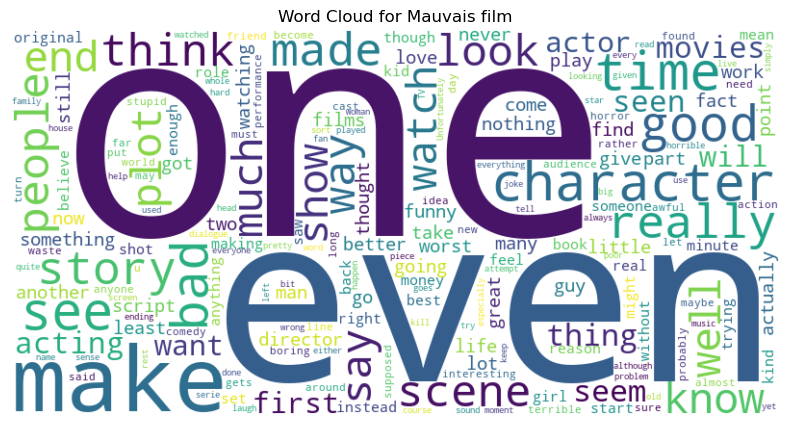

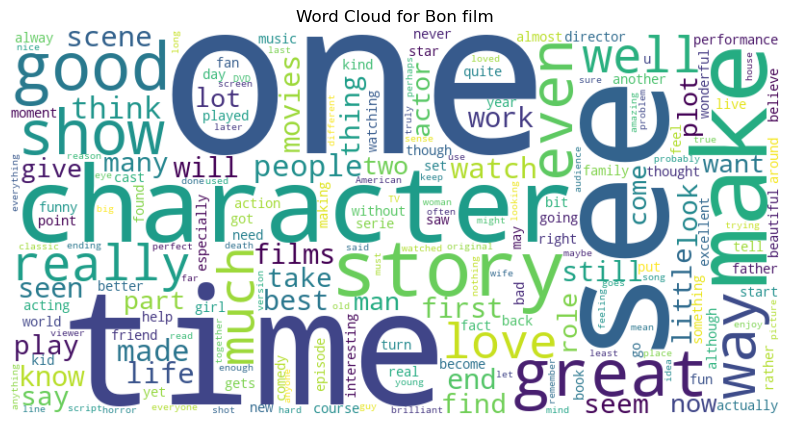

In [4]:
additional_stopwords = set(["movie","film","br"])
stopwords = STOPWORDS.union(additional_stopwords)

for label, category in [(0, "Mauvais film"), (1, "Bon film")]:
    category_data = df[df['label'] == label]['text'].str.cat(sep=' ')
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(category_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {category}")
    plt.show()

In [5]:
nltk.download('punkt')

DetectorFactory.seed = 0  
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

df['language'] = df['text'].apply(detect_language)

language_counts = df['language'].value_counts()
print("Distribution des langues détectées :")
print(language_counts)

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Distribution des langues détectées :
language
en    24999
nl        1
Name: count, dtype: int64


In [6]:
df[df['language']=='nl'].iloc[0]['text']

"You'd better choose Paul Verhoeven's even if you have watched it."


Statistiques sur le nombre de mots :
count    25000.000000
mean       233.787200
std        173.733032
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: word_count, dtype: float64


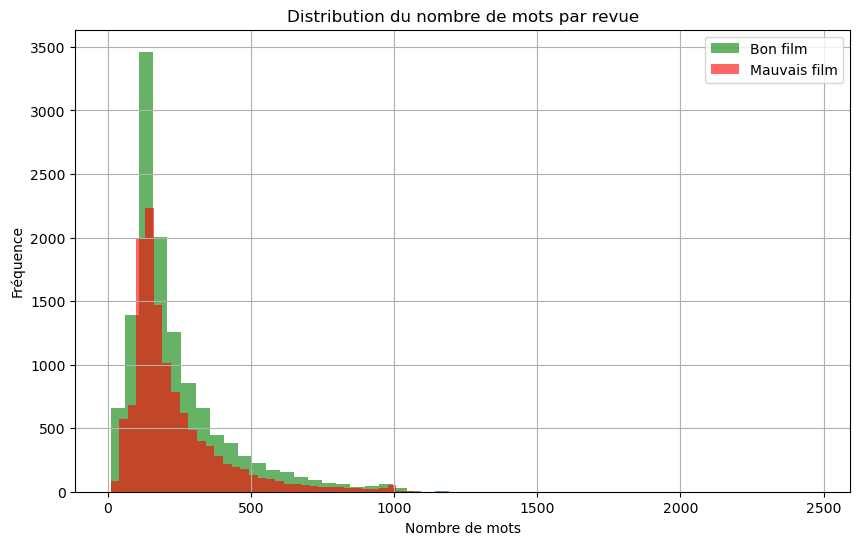

In [7]:
def count_words(text):
    if isinstance(text, str):  
        words = text.split()  
        return len(words)
    return 0

df['word_count'] = df['text'].apply(count_words)

# Affichage des statistiques globales
word_count_distribution = df['word_count'].describe()
print("\nStatistiques sur le nombre de mots :")
print(word_count_distribution)

# Séparer les données selon la catégorie
word_count_good = df[df['label'] == 1]['word_count']
word_count_bad = df[df['label'] == 0]['word_count']

# Affichage de l'histogramme superposé
plt.figure(figsize=(10, 6))
plt.hist(word_count_good, bins=50, alpha=0.6, color='green', label="Bon film")
plt.hist(word_count_bad, bins=50, alpha=0.6, color='red', label="Mauvais film")
plt.title('Distribution du nombre de mots par revue')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True)
plt.show()

# **LLM prediction**

In [ ]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 18.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 22.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 17.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 32.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 32.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 30.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 33.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━

In [23]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch

/opt/conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


ModuleNotFoundError: No module named 'torch'